**Data Cleansing**

In [ ]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/fitness_class_2212_fromKaggle.csv')

In [7]:
df['time'] = df['time'].replace({
    'AM' : 0,
    'PM' : 1
})

/tmp/ipython-input-3246525242.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['time'] = df['time'].replace({


In [8]:
df['day_of_week'].value_counts()

,count
day_of_week,
Fri,279
Thu,241
Mon,218
Sun,213
Sat,202
Tue,195
Wed,81
Wednesday,35
Fri.,26


In [11]:
df['day_of_week'] = df['day_of_week'].replace({
    'Sun' : 1,
    'Mon' : 2,
    'Monday' : 2,
    'Tue' : 3,
    'Wed' : 4,
    'Wednesday' : 4,
    'Thu' : 5,
    'Fri' : 6,
    'Fri.' : 6,
    'Sat' : 7
})

In [10]:
df

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,4,1,Strength,0
1,10,79.01,2,2,0,HIIT,0
2,16,74.53,14,1,0,Strength,0
3,5,86.12,10,6,0,Cycling,0
4,15,69.29,8,5,0,HIIT,0
...,...,...,...,...,...,...,...
1495,21,79.51,10,6,0,HIIT,0
1496,29,89.55,2,2,0,Strength,0
1497,9,87.38,4,3,0,HIIT,0
1498,34,68.64,14,1,0,Aqua,0


In [12]:
df['months_as_member'] = df['months_as_member'].apply(pd.to_numeric, errors='coerce')
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')
df['days_before'] = df['days_before'].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['months_as_member', 'weight', 'days_before'])

In [13]:
df['category'].value_counts()

,count
category,
HIIT,645
Cycling,360
Strength,228
Yoga,135
Aqua,74
-,13


In [14]:
df = df[df['category'] != '-'].copy()

In [17]:
df['category'] = df['category'].replace({
    'HIIT' : 0,
    'Cycling' : 1,
    'Strength' : 2,
    'Yoga' : 3,
    'Aqua' : 4
})

In [16]:
df

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8.0,4,1,2,0
1,10,79.01,2.0,2,0,0,0
2,16,74.53,14.0,1,0,2,0
3,5,86.12,10.0,6,0,1,0
4,15,69.29,8.0,5,0,0,0
...,...,...,...,...,...,...,...
1495,21,79.51,10.0,6,0,0,0
1496,29,89.55,2.0,2,0,2,0
1497,9,87.38,4.0,3,0,0,0
1498,34,68.64,14.0,1,0,4,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1442 non-null   int64  
 1   weight            1442 non-null   float64
 2   days_before       1442 non-null   float64
 3   day_of_week       1442 non-null   int64  
 4   time              1442 non-null   int64  
 5   category          1442 non-null   int64  
 6   attended          1442 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 90.1 KB


**Training pytorch_lightning**

In [19]:
!pip install torchinfo
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 60.5 MB/s eta 0:00:00


In [20]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

feature_cols = ['months_as_member','weight','days_before','day_of_week','time','category']
X = df[feature_cols].to_numpy(dtype=np.float32)
y = df['attended'].to_numpy(dtype='float32').reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_val_t   = torch.tensor(X_val, dtype=torch.float32)
y_val_t   = torch.tensor(y_val, dtype=torch.float32)

dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
print(dataset.tensors)

train_loader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(X_train_t.shape, y_train_t.shape)

(tensor([[  6.0000, 105.3000,   7.0000,   4.0000,   1.0000,   0.0000],
        [  8.0000,  89.3900,   7.0000,   5.0000,   1.0000,   0.0000],
        [ 50.0000,  68.9200,   2.0000,   2.0000,   0.0000,   1.0000],
        ...,
        [  4.0000,  80.7600,   8.0000,   5.0000,   1.0000,   0.0000],
        [ 34.0000,  75.3400,  10.0000,   6.0000,   0.0000,   1.0000],
        [  8.0000,  92.2400,   2.0000,   2.0000,   0.0000,   2.0000]]), tensor([[0.],
        [0.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]]))
torch.Size([1153, 6]) torch.Size([1153, 1])


In [21]:
import torch.nn as nn
import pytorch_lightning as pl

class SimpleModel(pl.LightningModule):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(6, 32)
        self.bn1 = nn.BatchNorm1d(32)

        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)

        self.fc3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)

        self.dropout = nn.Dropout(p=0.3)
        self.out = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)

        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.fc3(x)))
        x = torch.sigmoid(self.out(x))
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        loss = nn.BCELoss()(output, y)  # Loss function
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        output = self(x)
        loss = nn.BCELoss()(output, y)
        return loss

    def test_step(self, batch, batch_idx): # optional for train but required for test model
        x, y = batch
        output = self(x)
        loss = nn.BCELoss()(output, y)
        self.log("test_loss", loss)
        return loss

    def configure_optimizers(self): # กำหนด optimizer
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer


In [22]:
model = SimpleModel()

trainer = pl.Trainer(max_epochs=2000)

trainer.fit(model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


┏━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name    ┃ Type        ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ fc1     │ Linear      │    224 │ train │     0 │
│ 1 │ bn1     │ BatchNorm1d │     64 │ train │     0 │
│ 2 │ fc2     │ Linear      │    528 │ train │     0 │
│ 3 │ bn2     │ BatchNorm1d │     32 │ train │     0 │
│ 4 │ fc3     │ Linear      │    136 │ train │     0 │
│ 5 │ bn3     │ BatchNorm1d │     16 │ train │     0 │
│ 6 │ dropout │ Dropout     │      0 │ train │     0 │
│ 7 │ out     │ Linear      │      9 │ train │     0 │
└───┴─────────┴─────────────┴────────┴───────┴───────┘

Trainable params: 1.0 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.0 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 8                                                                                           
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

/usr/local/lib/python3.12/dist-packages/pytorch_lightning/loops/fit_loop.py:317: The number of training batches 
(36) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if
you want to see logs for the training epoch.

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2000` reached.


In [23]:
model.eval()
with torch.no_grad():
    xb = torch.tensor(X_val, dtype=torch.float32)
    probs = model(xb)
    preds = (probs > 0.5).float().numpy().reshape(-1)
    acc = (preds == y_val.reshape(-1)).mean()

print("val acc =", acc)

val acc = 0.7370242214532872


**Training pytorch**

In [28]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchinfo import summary
import matplotlib.pyplot as plt

In [25]:
class SimpleNN_Dropout(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(64, 32)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)

        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.fc3(x))
        return x

In [33]:
def train_model(model, train_loader, val_loader, epochs=1000, lr=0.001):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

In [30]:
def plot_losses(train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [34]:
model = SimpleNN_Dropout(input_dim=6)
train_losses, val_losses = train_model(model, train_loader, val_loader, epochs=1000, lr=0.001)

model.eval()
with torch.no_grad():
    probs = model(X_val_t)
    preds = (probs > 0.5).float()
    acc = (preds.eq(y_val_t)).float().mean().item()

print("val acc =", acc)

val acc = 0.775086522102356


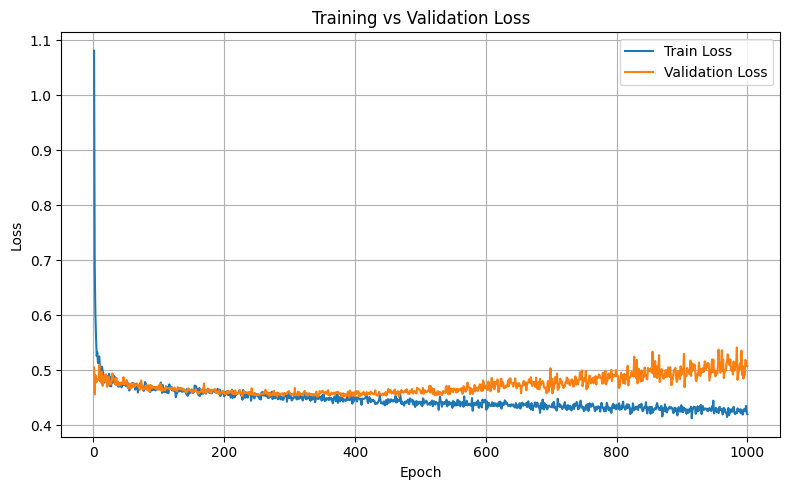

In [36]:
plot_losses(train_losses, val_losses)